In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = (12,6)

In [6]:
np.random.seed(42)
n_samples=5

x = np.linspace(0, 20, 15)
# data generating process for y, the true relationship between x and y
#there is a linear relationship between the x and y

y = 5 * x + np.random.normal(0.0, 20.0, 15)

#get X the right shape 
X = x.reshape(15, 1)

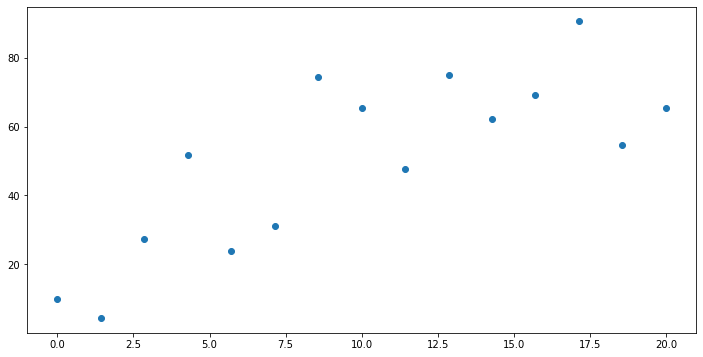

In [22]:
plt.scatter(X,y)

In [24]:
m=LinearRegression()
m.fit(X,y)

LinearRegression()

In [25]:
#make prediction 
y_pred=m.predict(X)

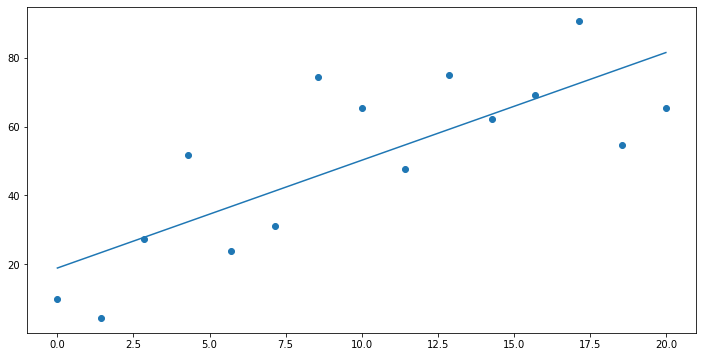

In [29]:
#plot
plt.scatter(X,y)
plt.plot(X,y_pred)

In [28]:
m.coef_  # estimated value of w

array([3.13158623])

In [30]:
df=pd.DataFrame({'x':x, 'y':y})

In [31]:
df.head()

,x,y
0,0.000000,9.934283
1,1.428571,4.377571
2,2.857143,27.239485
3,4.285714,51.889169
4,5.714286,23.888361


In [33]:
df['x^2']=df['x']**2
df.head()

,x,y,x^2
0,0.000000,9.934283,0.000000
1,1.428571,4.377571,2.040816
2,2.857143,27.239485,8.163265
3,4.285714,51.889169,18.367347
4,5.714286,23.888361,32.653061


In [34]:
m.fit(df[['x','x^2']], df['y'])

LinearRegression()

In [37]:
y_pred_2= m.predict(df[['x','x^2']])

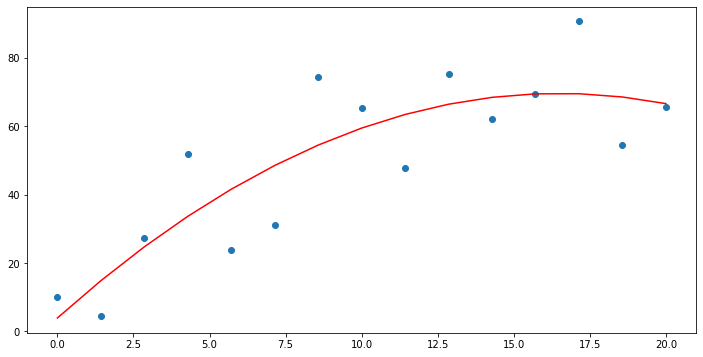

In [38]:
plt.scatter(x,y)
plt.plot(x,y_pred_2 , color='r')

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
polynomial_transformer=PolynomialFeatures(degree=9, include_bias=False)
polynomial_features=pd.DataFrame(polynomial_transformer.fit_transform(X),columns=polynomial_transformer.get_feature_names())

In [46]:
polynomial_features

,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.428571,2.040816,2.915452,4.164931,5.949902e+00,8.499860e+00,1.214266e+01,1.734665e+01,2.478093e+01
2,2.857143,8.163265,23.323615,66.638900,1.903969e+02,5.439910e+02,1.554260e+03,4.440743e+03,1.268784e+04
3,4.285714,18.367347,78.717201,337.359434,1.445826e+03,6.196398e+03,2.655599e+04,1.138114e+05,4.877631e+05
4,5.714286,32.653061,186.588921,1066.222407,6.092699e+03,3.481543e+04,1.989453e+05,1.136830e+06,6.496173e+06
5,7.142857,51.020408,364.431487,2603.082049,1.859344e+04,1.328103e+05,9.486451e+05,6.776036e+06,4.840026e+07
6,8.571429,73.469388,629.737609,5397.750937,4.626644e+04,3.965695e+05,3.399167e+06,2.913572e+07,2.497347e+08
7,10.000000,100.000000,1000.000000,10000.000000,1.000000e+05,1.000000e+06,1.000000e+07,1.000000e+08,1.000000e+09
8,11.428571,130.612245,1492.711370,17059.558517,1.949664e+05,2.228187e+06,2.546500e+07,2.910285e+08,3.326040e+09
9,12.857143,165.306122,2125.364431,27326.114119,3.513358e+05,4.517174e+06,5.807795e+07,7.467165e+08,9.600641e+09


In [47]:
# fit the model
m_poly=LinearRegression()
m_poly.fit(polynomial_features, y)

LinearRegression()

In [48]:
# prediction 
y_pred_poly=m_poly.predict(polynomial_features)

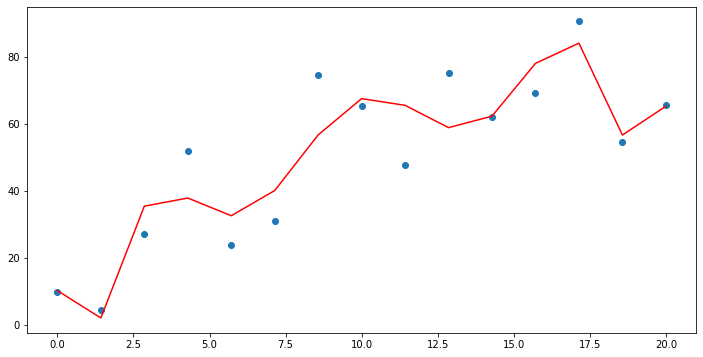

In [49]:
# plot it
plt.scatter(x,y)
plt.plot(x,y_pred_poly, color='r')